In [42]:

##########################################################
#  Python script template for Question 3 (IAML Level 10)
#  Note that:
#  - You should not change the filename of this file, 'iaml01cw2_q3.py', which is the file name you should use when you submit your code for this question.
#  - You should define the functions shown below in your code.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define helper functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission
##########################################################

#--- Code for loading the data set and pre-processing --->
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.insert(0, os.path.abspath('../helpers'))
from iaml01cw2_helpers import *

#Load the data:
dataPath = os.path.join(os.getcwd(),'../data')
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2(dataPath)

from numpy import loadtxt
languages = loadtxt("../data/languages.txt", dtype="str",delimiter="\n", unpack=False)
#<----

# Q3.1
def iaml01cw2_q3_1():
    from sklearn.cluster import KMeans
    import math
    
    print("Starting Q3.1...\n")
    
    #Initialize and fit our KMeans model
    km = KMeans(n_clusters=22, random_state =1).fit(Xtrn)
    centers = km.cluster_centers_
    
    #Variable to store the sum of squared distances
    sumSquaredDists = 0
    
    #Iterate through the dataset and calculate the squared distance between each sample and it's cluster
    for row in range(Xtrn.shape[0]):
        cluster = km.labels_[row]
        dist = math.sqrt(sum((centers[cluster] - Xtrn[row,:])**2))
        sumSquaredDists += dist**2
    
    #Print the calculated sum of squared distances
    print("Sum of squared distances (Euclidean) of samples to their closest cluster center:")
    print(sumSquaredDists)
    
    #Calculate the number of samples for each cluster
    frequencies = np.zeros(22)
    for l in km.labels_:
        frequencies[l] += 1
    
    #Print the number of samples for each cluster
    print("\nNumber of samples for each cluster:")
    for i in range(22):
        print("Cluster " + str(i+1) + " = " + str(int(frequencies[i])))
        
#
# iaml01cw2_q3_1()   # comment this out when you run the function

# Q3.2
def iaml01cw2_q3_2():
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import math
    from matplotlib import ticker
    from matplotlib import lines
    
    #Set the quality of the plt's figure output
    plt.rcParams["figure.figsize"] = (10,10)
    
    print("Starting Q3.2...\n")
    
    #Get the cluster centers
    km = KMeans(n_clusters=22, random_state =1)
    km.fit(Xtrn)
    centers = km.cluster_centers_
    
    #Calculate the mean vectors for each class
    frequencies = np.zeros(22)
    means = np.zeros((22,26))
    
    for row in range(Xtrn.shape[0]):
        label = Ytrn[row]
        frequencies[label] += 1
        means[label,:] += Xtrn[row,:]
        
    for i in range(22):
        means[i,:] = means[i,:]/frequencies[i]
        
    #Perform PCA on this data
    pca = PCA(n_components=2)
    
    newMeans = pca.fit_transform(means)
    newCenters = pca.transform(centers)
    
    #Plot this 2D-PCA plane
    cMap = plt.cm.get_cmap("nipy_spectral")
    colors = range(22)
    
    sc = plt.scatter(newMeans[:,0],newMeans[:,1],s=50,c=colors,alpha=0.8,marker="o",vmin=0,vmax=21,cmap=cMap)
    plt.scatter(newCenters[:,0],newCenters[:,1],s=65,c="black",alpha=0.45,marker="^")
    
    #Implement a colorbar
    cbar = plt.colorbar(sc)
    cbar.locator = ticker.MaxNLocator(nbins=22)
    cbar.update_ticks()
    cbar.ax.set_yticklabels(range(22))
    cbar.set_label("\nClass number", fontsize=15)
    
    #Custom legend
    legEls = [lines.Line2D([0], [0], marker='o', color='w', label='Mean class vectors',
                          markerfacecolor='black', markersize=10), lines.Line2D([0], [0], marker='^', color='w', label='Cluster centers',
                          markerfacecolor='black', markersize=10)]
    plt.legend(handles=legEls,loc="upper right",fontsize=12)
    
    #Plot features for further readability
    plt.grid(True)
    plt.xlabel("PC1",fontsize=16)
    plt.ylabel("PC2",fontsize=16)
    plt.title("A 2D-PCA plane to show the relationship between the mean\nclass vectors and the trained cluster centers",fontsize=18)
    
#
# iaml01cw2_q3_2()   # comment this out when you run the function

# Q3.3
def iaml01cw2_q3_3():
    import scipy.cluster.hierarchy as hierarchy
    import math
    
    #Set the quality of the plt's figure output
    plt.rcParams["figure.figsize"] = (8,7)
    
    print("Starting Q3.3...\n")
    
    #Initialize numpy arrays to store the vector sums and frequencies for each class
    frequencies = np.zeros(22)
    means = np.zeros((22,26))
    
    #Iterate over the training dataset and populate the arrays
    for row in range(Xtrn.shape[0]):
        label = Ytrn[row]
        frequencies[label] += 1
        means[label,:] += Xtrn[row,:]
    
    #Divide each mean by it's relative frequency
    for i in range(22):
        means[i,:] = means[i,:]/frequencies[i]
    
    #Carry out Hierarchical clustering on the mean class vectors with Ward's linkage
    z = hierarchy.linkage(means,method="ward")
    
    #Display the respective dendogram
    hierarchy.dendrogram(z,orientation="right",leaf_font_size=14, labels=languages)
    
#
# iaml01cw2_q3_3()   # comment this out when you run the function

# Q3.4
def iaml01cw2_q3_4():
    from sklearn.cluster import KMeans
    import scipy.cluster.hierarchy as hierarchy
    
    #Set the quality of the plt's figure output
    plt.rcParams["figure.figsize"] = (13,13)
    
    print("Starting Q3.4...\n")
    
    #Array to store the indexes of every instance that belongs to each class
    dataIndexes = []
    for l in range(22):
        dataIndexes.append([])
    
    #Iterates through the training set and stores the indexes in the dataIndexes array
    for row in range(Xtrn.shape[0]):
        lang = Ytrn[row]
        dataIndexes[lang] += [row]
    
    
    #Kmeans initialisation
    km = KMeans(n_clusters=3,random_state=1)
    
    #Numpy array to store the 3 cluster centers for all 22 classes
    centers = np.empty((66,26))
    labels = []
    
    #Iterates through each class
    for c in range(22):
        indexes = dataIndexes[c]
        
        #Numpy array to store the data for the given class (c)
        classData = np.empty((len(indexes),26))
        
        #Iterate through the dataIndexes and store the real data in 'classData'
        for d in range(len(indexes)):
            index = indexes[d]
            classData[d,:] = Xtrn[index,:]
        
        #Fit our KMeans model using this class data
        km.fit(classData)
        
        #Add the class' cluster centers to 'centers'
        classCenters = km.cluster_centers_
        centers[c*3,:] = classCenters[0,:]
        centers[(c*3)+1,:] = classCenters[1,:]
        centers[(c*3)+2,:] = classCenters[2,:]
        
        #Add the appropriate labels for each cluster
        lang = str(c)
        if len(lang) < 2:
            lang = "0" + lang
        lang = "L" + lang
        labels.append(lang)
        labels.append(lang)
        labels.append(lang)
    
    
    #Produce seperate dendograms using these 3 linkage methods
    plt.figure(3, figsize=(10, 11))
    plt.suptitle("Hierarchical clustering dendograms with varying linkage trained over the\nthree cluster centers for each of the languages in the dataset",fontsize=16)
    
    methods = ["ward","single","complete"]
    for m in range(3):
        method = methods[m]
        z = hierarchy.linkage(centers,method=method)
        
        plt.subplot(1,3,m+1)
        plt.title(method.capitalize() + " linkage")
        hierarchy.dendrogram(z,labels=labels,leaf_font_size=10,orientation="right")
        
    
#
# iaml01cw2_q3_4()   # comment this out when you run the function

# Q3.5
def iaml01cw2_q3_5():
    from sklearn.mixture import GaussianMixture
    
    #Set the quality of the plt's figure output
    plt.rcParams["figure.figsize"] = (12,9)
    
    print("Starting Q3.5...\n")
    
    #Retrieve the language 0 training data
    Xtrn_l0_indexes = []
    
    for x1 in range(Xtrn.shape[0]):
        if Ytrn[x1] == 0:
            Xtrn_l0_indexes.append(x1)
    
    Xtrn_l0 = np.empty((len(Xtrn_l0_indexes),26))
    
    for ind1 in range(len(Xtrn_l0_indexes)):
        Xtrn_l0[ind1,:] = Xtrn[Xtrn_l0_indexes[ind1],:]
        
    #Retrieve the language 0 testing data
    Xtst_l0_indexes = []
    
    for x2 in range(Xtst.shape[0]):
        if Ytst[x2] == 0:
            Xtst_l0_indexes.append(x2)
    
    Xtst_l0 = np.empty((len(Xtst_l0_indexes),26))
    
    for ind2 in range(len(Xtst_l0_indexes)):
        Xtst_l0[ind2,:] = Xtst[Xtst_l0_indexes[ind2],:]
        
    #Define possible values of K (mixture components)
    k = [1,3,5,10,15]
    
    #Define possible types of covariance matrices
    covTypes = ["diag","full"]
    
    #Define numpy matrix to store log-likelihood scores
    avgLLH = np.empty((4,5))
    
    #Iterate through all possible covariance matrix types
    for c in range(2):
        c_type = covTypes[c]
            
        #Iterate through all possible # mixture components (K)
        for mc in range(5):
            K = k[mc]
            
            #Train the GMM
            gmm = GaussianMixture(n_components=K, covariance_type=c_type).fit(Xtrn_l0)
            
            #Calculate the avg LLH on the training data
            avgLLH[c*2,mc] = gmm.score(Xtrn_l0)
            
            #Calculate the avg LLH on the testing data
            avgLLH[c*2+1,mc] = gmm.score(Xtst_l0)
    
    #Plot the seperate functions
    plt.plot(k,avgLLH[0,:],c="blue",label = "Training data score for 'diagonal covariance'",marker="o")
    plt.plot(k,avgLLH[1,:],c="blue",label = "Testing data score for 'diagonal covariance'",marker="^")
    plt.plot(k,avgLLH[2,:],c="red",label = "Training data score for 'full covariance'",marker="o")
    plt.plot(k,avgLLH[3,:],c="red",label = "Testing data score for 'full covariance'",marker="^")
    
    #Add labelling and further plot readability
    plt.xlabel("K (# mixture components)",fontsize=16)
    plt.ylabel("Per-sample average log-likelihood",fontsize=16)
    plt.title("A graph to show the scores of a GMM trained on language 0 using varying types\nof covariance matrices and varying numbers of mixture components (K)",fontsize=18)
    plt.grid(True)
    plt.legend(loc="upper left",fontsize=12)
    plt.xticks(k,k)
    
    print("Average per-sample log-likelihoods:")
    print(np.round(avgLLH,3))

#
# iaml01cw2_q3_5()   # comment this out when you run the function



Starting Q3.5...

Average per-sample log-likelihoods:
[[14.28  15.398 16.015 16.855 17.554]
 [13.843 15.042 15.885 16.618 16.867]
 [16.394 18.087 19.045 21.237 22.794]
 [15.811 17.014 16.873 15.125 11.266]]


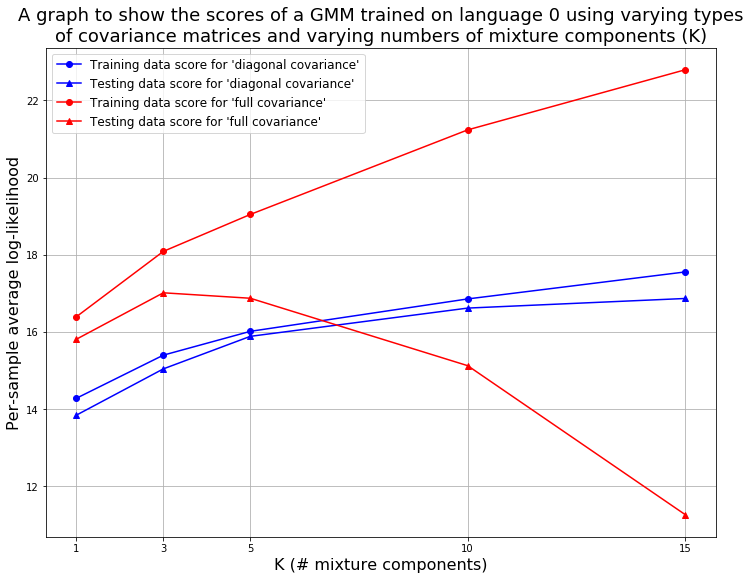

In [43]:
iaml01cw2_q3_5()